<a href="https://colab.research.google.com/github/Vivek-afk81/data_mining/blob/main/PCA_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PCA** CHALLENGE

In this challenge

1. Set up the PCA object.
2. Project the data onto the principal directions found by PCA.
3. Plot the ratio of variances explained by each direction.
4. Create a scatter plot of projected data along the first two principal directions.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [6]:
# Change to a specific directory
os.chdir('/content/drive/My Drive/data_mining/data')

# Verify current directory
print(os.getcwd())

/content/drive/My Drive/data_mining/data


In [7]:
!ls

optdigits.csv  optdigits_trn.csv  optdigits_tst.csv  swiss.csv


###Load and prepare the data

In [10]:
df_swiss=pd.read_csv("swiss.csv")
print(df_swiss.head())
df_swiss.columns

       Location  Fertility  Agriculture  Examination  Education  Catholic  \
0    Courtelary       80.2         17.0           15         12      9.96   
1      Delemont       83.1         45.1            6          9     84.84   
2  Franches-Mnt       92.5         39.7            5          5     93.40   
3       Moutier       85.8         36.5           12          7     33.77   
4    Neuveville       76.9         43.5           17         15      5.16   

   Infant.Mortality  
0              22.2  
1              22.2  
2              20.2  
3              20.3  
4              20.6  


Index(['Location', 'Fertility', 'Agriculture', 'Examination', 'Education',
       'Catholic', 'Infant.Mortality'],
      dtype='object')

In [11]:
#What is X in the Swiss dataset? --->All columns are attributes

X=df_swiss[[
    'Location', 'Fertility', 'Agriculture', 'Examination', 'Education',
    'Catholic', 'Infant.Mortality'
]]


In [25]:
# Making sure everything is numeric use onehot encoder
cat_cols=['Location']
num_cols=[
    'Fertility', 'Agriculture', 'Examination', 'Education',
    'Catholic', 'Infant.Mortality'
]

preprocessor=ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(sparse_output=False),cat_cols),
        ('num','passthrough',num_cols)
    ]
)

X_encoded=preprocessor.fit_transform(df_swiss)
pd.DataFrame(X_encoded)

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,80.2,17.0,15.0,12.0,9.96,22.2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,83.1,45.1,6.0,9.0,84.84,22.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,92.5,39.7,5.0,5.0,93.40,20.2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,85.8,36.5,12.0,7.0,33.77,20.3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,76.9,43.5,17.0,15.0,5.16,20.6
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,76.1,35.3,9.0,7.0,90.57,26.6
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,83.8,70.2,16.0,7.0,92.85,23.6
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,92.4,67.8,14.0,8.0,97.16,24.9
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,82.4,53.3,12.0,7.0,97.67,21.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,82.9,45.2,16.0,13.0,91.38,24.4


####Standarization

these features are very different scales

In [22]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_encoded)

####PCA


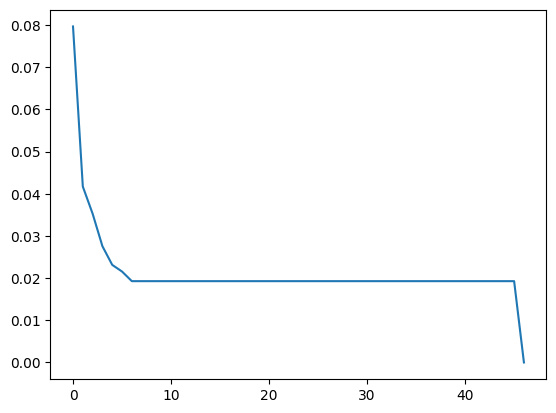

In [23]:
pca=PCA()

X_pca=pca.fit_transform(X_scaled)
plt.plot(pca.explained_variance_ratio_)

**We did OneHotEncoded our dataset to make sure everything is numeric but it explodes dimensionality**

hence its not preferred so lets drop the location column entirely to see the PCA

In [42]:
X=df_swiss[[
    'Fertility', 'Agriculture', 'Examination', 'Education',
    'Catholic', 'Infant.Mortality'
]]

#Standardization
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#PCA
pca=PCA()
X_pca=pca.fit_transform(X_scaled)

plotting the Explained variance ratio

[0.53329283 0.19805137 0.1412683  0.07315478 0.03408895 0.02014376]


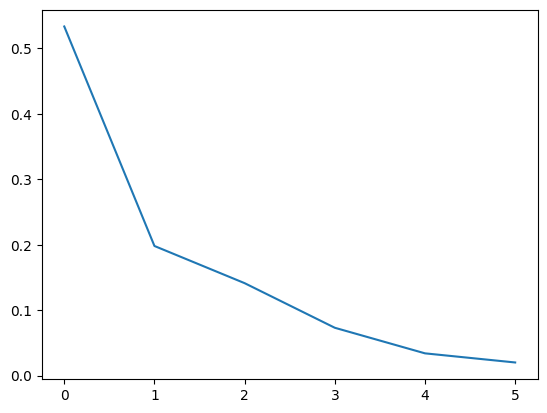

In [46]:
plt.plot(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)

<Axes: >

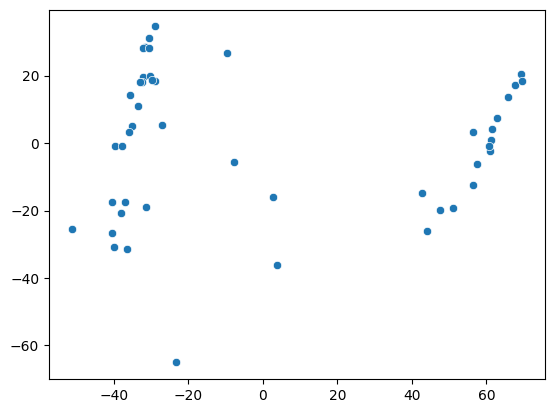

In [48]:
#Without the standardization
pca=PCA()
X_pca=pca.fit_transform(X)

sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1]
)

In [36]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

#Interpret components using loadings
loadings=pd.DataFrame(
    pca.components_.T,
    columns=['PC1','PC2'],
    index=X.columns
)
print(loadings)

                       PC1       PC2
Fertility        -0.456988  0.322028
Agriculture      -0.424214 -0.411513
Examination       0.509733  0.125017
Education         0.454312  0.179049
Catholic         -0.350111  0.145873
Infant.Mortality -0.149667  0.811164


1. What dominates PC1?

*  Positive side:
*  Examination
*  Education
*  Negative side:
*  Fertility
*  Agriculture
*  Catholic

PC1 contrasts educated, modern provinces against rural, religious, high-fertility provinces.

2. What dominates PC2?

* Overwhelmingly Infant.Mortality
* Secondary opposition from Agriculture


PC2 captures health and survival conditions, largely independent of education.

###Visualizations


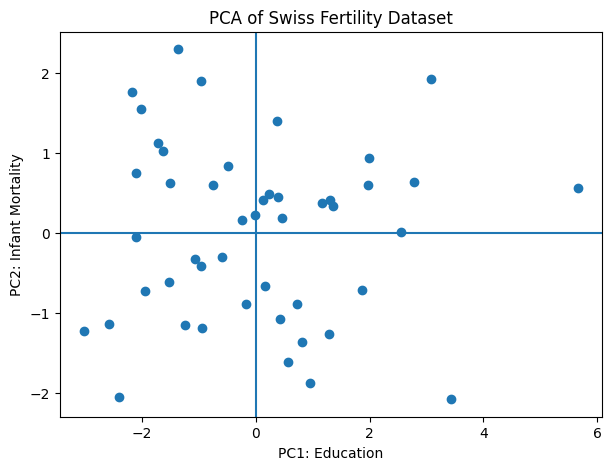

In [39]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0],X_pca[:,1])

plt.xlabel("PC1: Education")
plt.ylabel("PC2: Infant Mortality")
plt.title("PCA of Swiss Fertility Dataset")

plt.axhline(0)
plt.axvline(0)
plt.show()

Top-left: rural, Catholic, high fertility, high infant mortality (traditional and poor health).

Bottom-left: rural, Catholic, high fertility, but relatively better infant health.

Top-right: educated, modern, low fertility, but still high infant mortality.

Bottom-right: educated, modern, low fertility, and good health conditions (most “developed” provinces in this context)

/tmp/ipython-input-3520774852.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  loadings.PC1[i]*3,
/tmp/ipython-input-3520774852.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  loadings.PC2[i]*3,
/tmp/ipython-input-3520774852.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings.PC1[i]*3.2,
/tmp/ipython-input-3520774852.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a fu

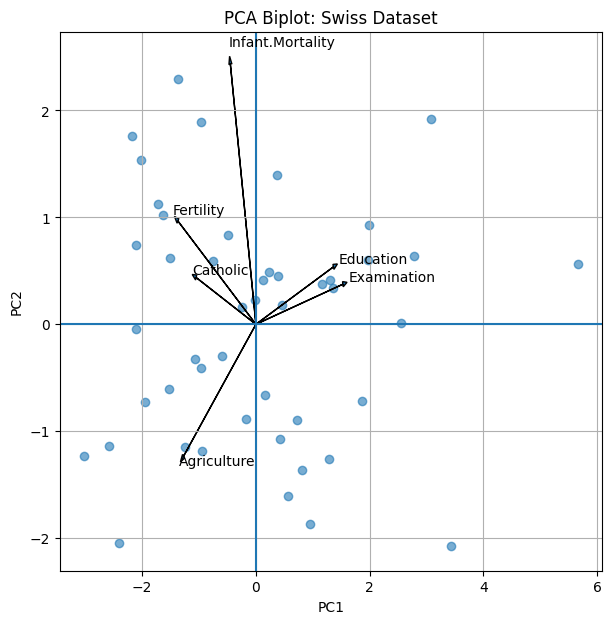

In [41]:
plt.figure(figsize=(7,7))

# Plot PCA scores
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)

# Plot loadings
for i, var in enumerate(X.columns):
    plt.arrow(0, 0,
              loadings.PC1[i]*3,
              loadings.PC2[i]*3,
              head_width=0.05)
    plt.text(loadings.PC1[i]*3.2,
             loadings.PC2[i]*3.2,
             var)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot: Swiss Dataset")
plt.axhline(0)
plt.axvline(0)
plt.grid()
plt.show()


#How to Read a PCA Biplot (Swiss Dataset)

## 1. Axes: PC1 and PC2

- **PC1 (x-axis)**  
  Represents the direction of **maximum variance** in the data  
  \[
  \text{PC1} = \mathbf{w}_1^\top \mathbf{X}
  \]

- **PC2 (y-axis)**  
  Represents the **second-largest variance**, orthogonal to PC1  
  \[
  \text{PC2} = \mathbf{w}_2^\top \mathbf{X}, \quad \mathbf{w}_1^\top \mathbf{w}_2 = 0
  \]

Together, PC1 and PC2 summarize most of the variability in the Swiss dataset.

- Points far apart → cantons with very different demographic and socio-economic profiles  
- Points close together → cantons with similar profiles  

---

## 2. Points: Observations (Swiss Cantons)

Each dot corresponds to **one Swiss canton** described by variables such as:

- Fertility
- Agriculture
- Examination
- Education
- Catholic
- Infant Mortality

Interpretation:
- Points near **(0,0)** → cantons with average characteristics
- Points far from the origin → cantons with extreme values
- Clusters → cantons with similar demographic patterns

---

## 3. Arrows: Variables (Loadings)

Each arrow represents an original variable and its **loading** on PC1 and PC2:

\[
\text{Loading}_{ij} = \text{cor}(X_j, \text{PC}_i)
\]

### Arrow length
- Long arrow → variable strongly contributes to PC1/PC2
- Short arrow → variable weakly represented in these components

### Arrow direction
- Right → positive association with PC1
- Left → negative association with PC1
- Up → positive association with PC2
- Down → negative association with PC2

Example:
- A long arrow for **Education** pointing left indicates lower education levels are associated with higher PC1 values.

---

## 4. Angles Between Arrows: Variable Correlations

- Small angle → strong **positive correlation**
- Angle close to \(180^\circ\) → strong **negative correlation**
- Angle close to \(90^\circ\) → little or **no correlation**

Example:
- **Education** and **Examination** arrows pointing in the same direction → strong positive correlation
- **Education** and **Fertility** arrows pointing opposite → negative correlation

---

## 5. Relating Cantons to Variables

To interpret a canton:
1. Project the point onto a variable arrow
2. Projection in the arrow direction → **high value**
3. Projection opposite the arrow → **low value**

Example:
- A canton lying far in the direction of the **Fertility** arrow has high fertility rates
- A canton opposite the **Education** arrow has lower education levels

---

## 6. The Origin (0,0)

- Represents the **mean-centered Swiss canton**
- Loadings originate here because PCA is based on centered data
- Grid lines help identify positive vs. negative contributions

---
